### This notebook analyze the data for all the sensers and I look at the frequency of failure for individual sensors and try to find the edge cases. Analyzing the edge case, I aim to see what could be the potential reason failure of sensors.

FYI: 

The sensor data is extracted for past 30 days.  
We are only considering a sensor failed if we do not have data for more than 1 hour in the database 

In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
import os

folder_path = 'data/'  # Replace with the actual folder path

# Get a list of all files in the folder
files = os.listdir(folder_path)

sensors = []
i = 0

dataframes = {}


for file in files:
    name = file.replace('.csv', '')
    sensors.append(name)
    
    # adding data from csv file to the list of data which is placed in dataframe which is a list
    dataframes[name] = pd.read_csv('data/' + file)


In [26]:
print(f" We have data for {len(sensors)} sensors.")

 We have data for 66 sensors.


In [28]:
failing_detail = {} 
missing = {}
    
for i in range(len(sensors)):
    df = dataframes[sensors[i]]
    # Convert the 'time' column to datetime format (if it's not already)
    df['time'] = pd.to_datetime(df['time'])

    # Sort the DataFrame by the 'time' column
    df.sort_values('time', inplace=True)

    # Calculate the time difference between consecutive rows
    time_diff = df['time'].diff()

    # Find the indexes where the time difference is greater than one hour (3600 seconds)
    missing_indexes = time_diff[time_diff > pd.Timedelta(hours=1)].index

    missing[sensors[i]] = missing_indexes

    num = len(missing_indexes)
    
    # maintaining recored of failure for analysis
    failing_detail[sensors[i]] = num   
   

<AxesSubplot:>

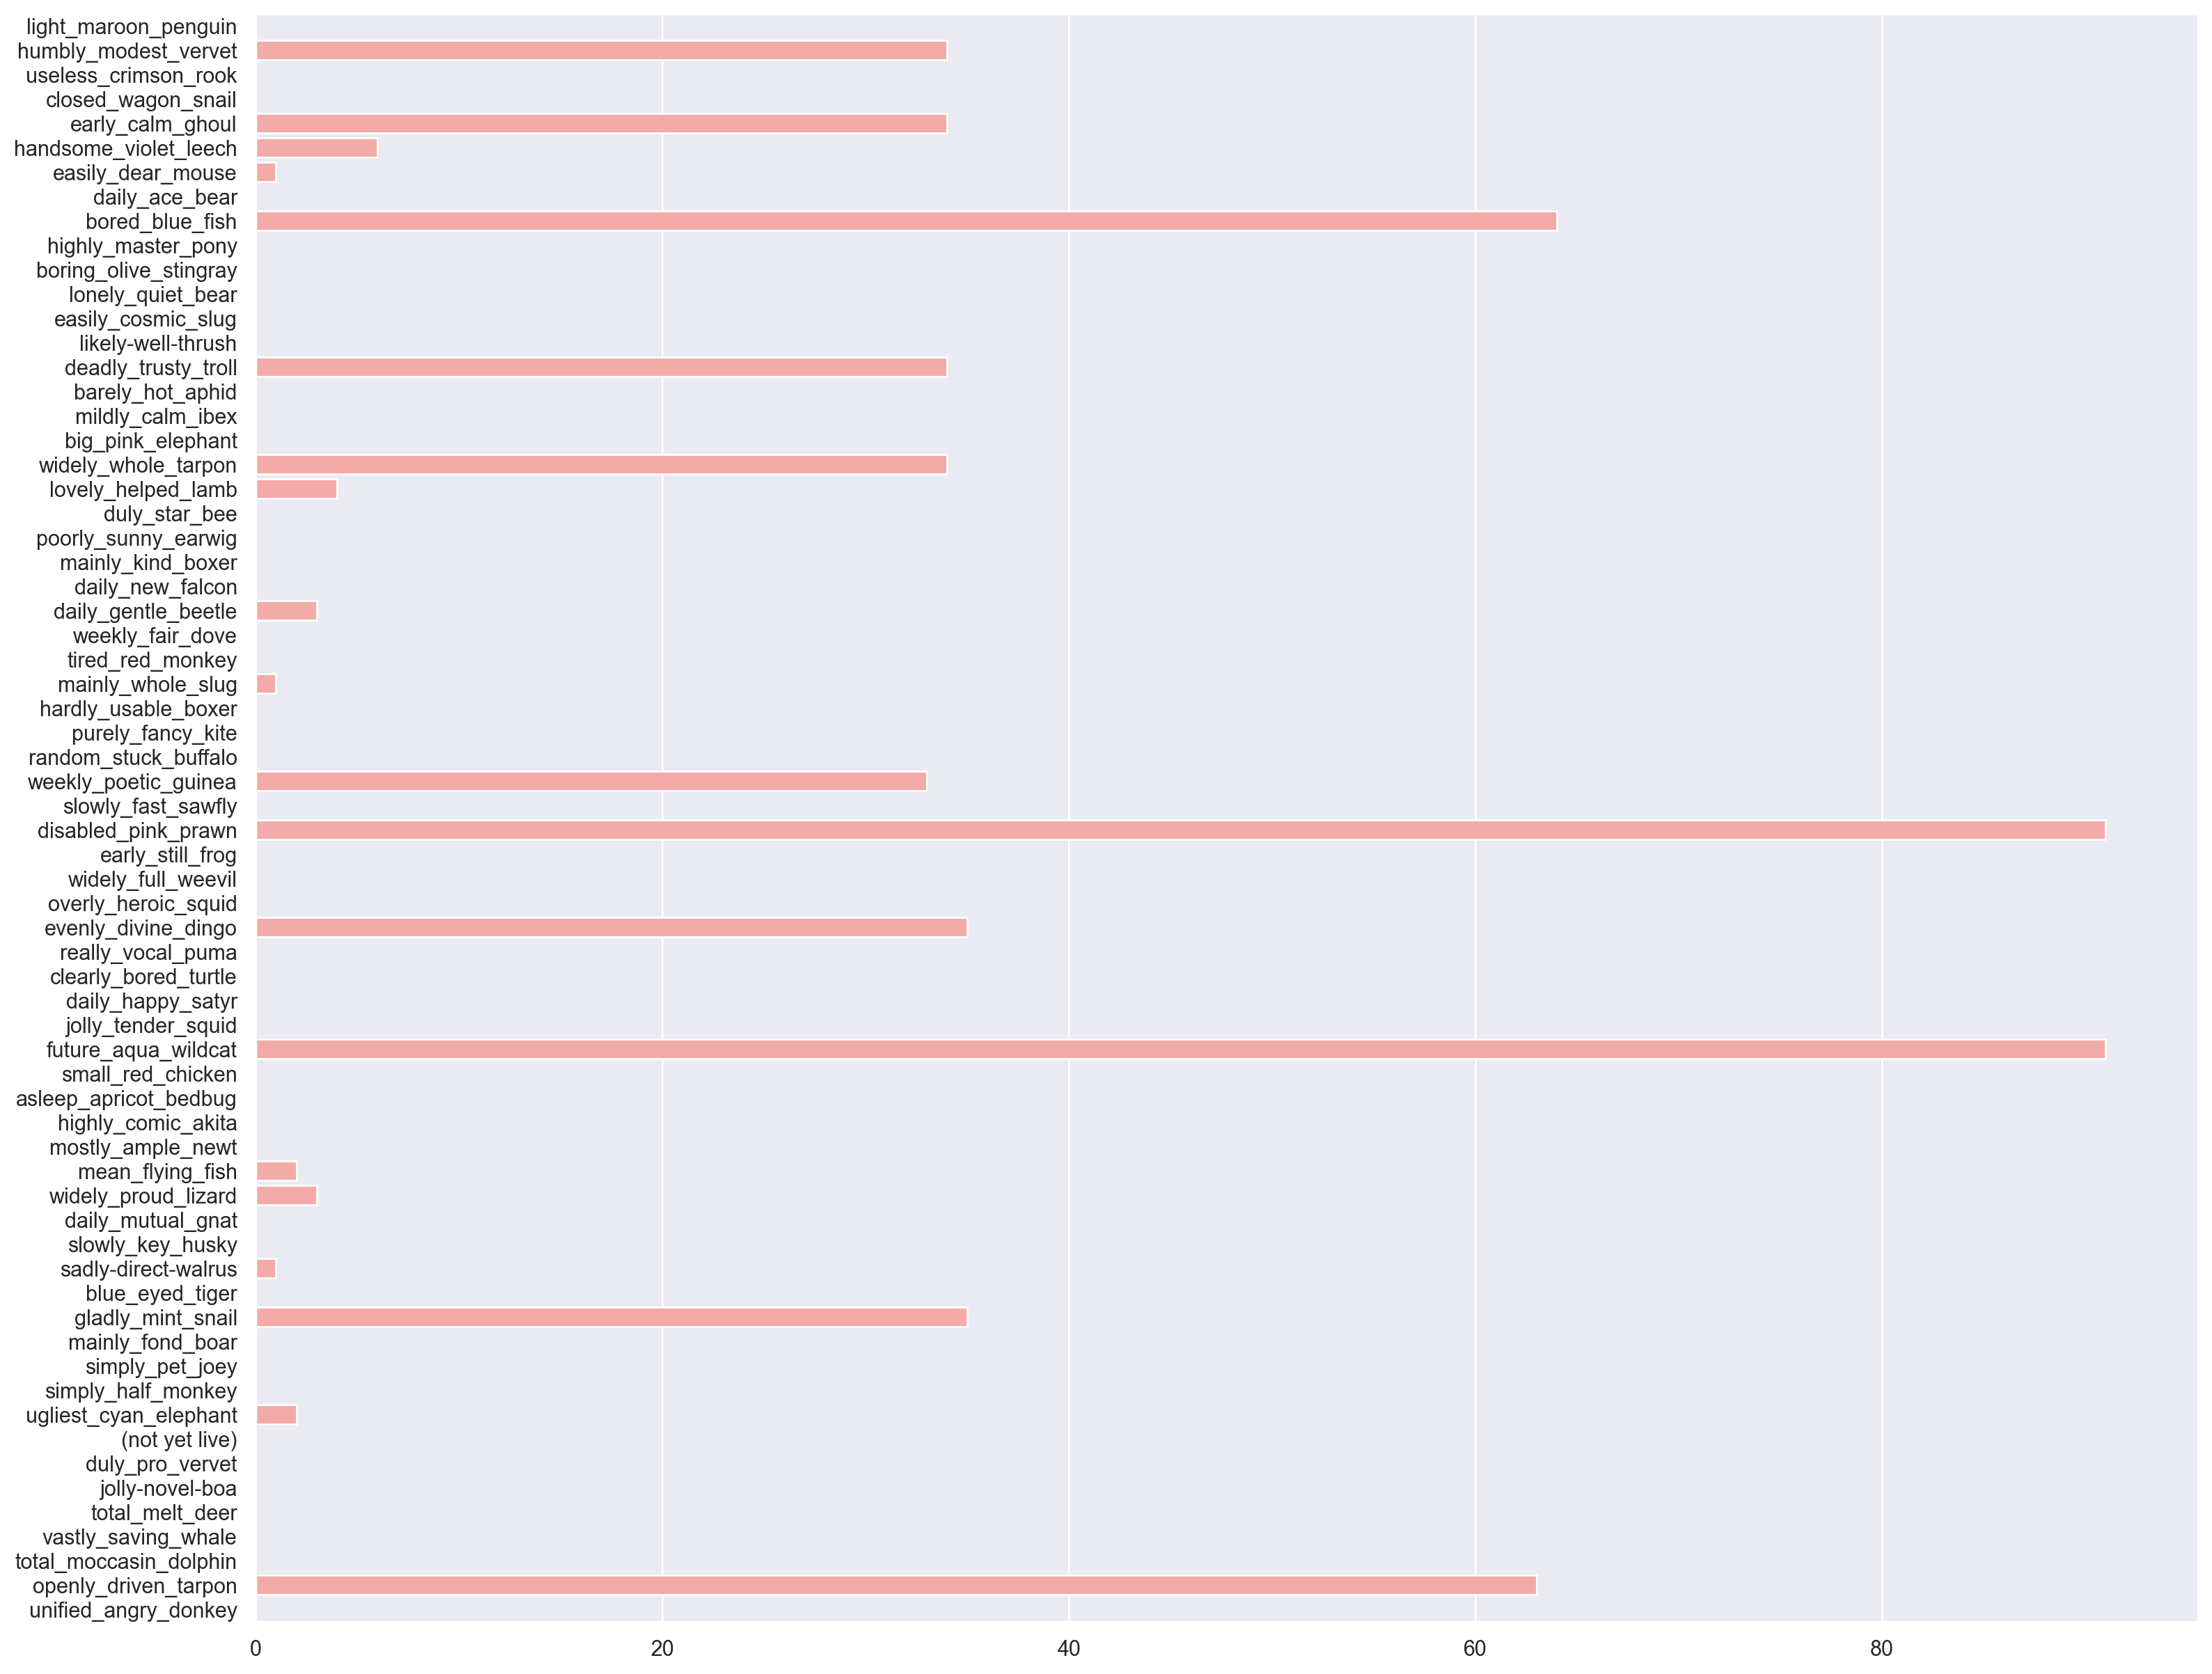

In [29]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(18,15)})
%config InlineBackend.figure_format = 'retina'

# plotting bar graph to see the frequency of failure for individual sensors

labels = list(failing_detail.keys())
heights = list(failing_detail.values())

sns.set_color_codes("pastel")
sns.barplot(x=heights, y=labels,
            label="Total", color="r", orient = 'h')

<AxesSubplot:ylabel='Count'>

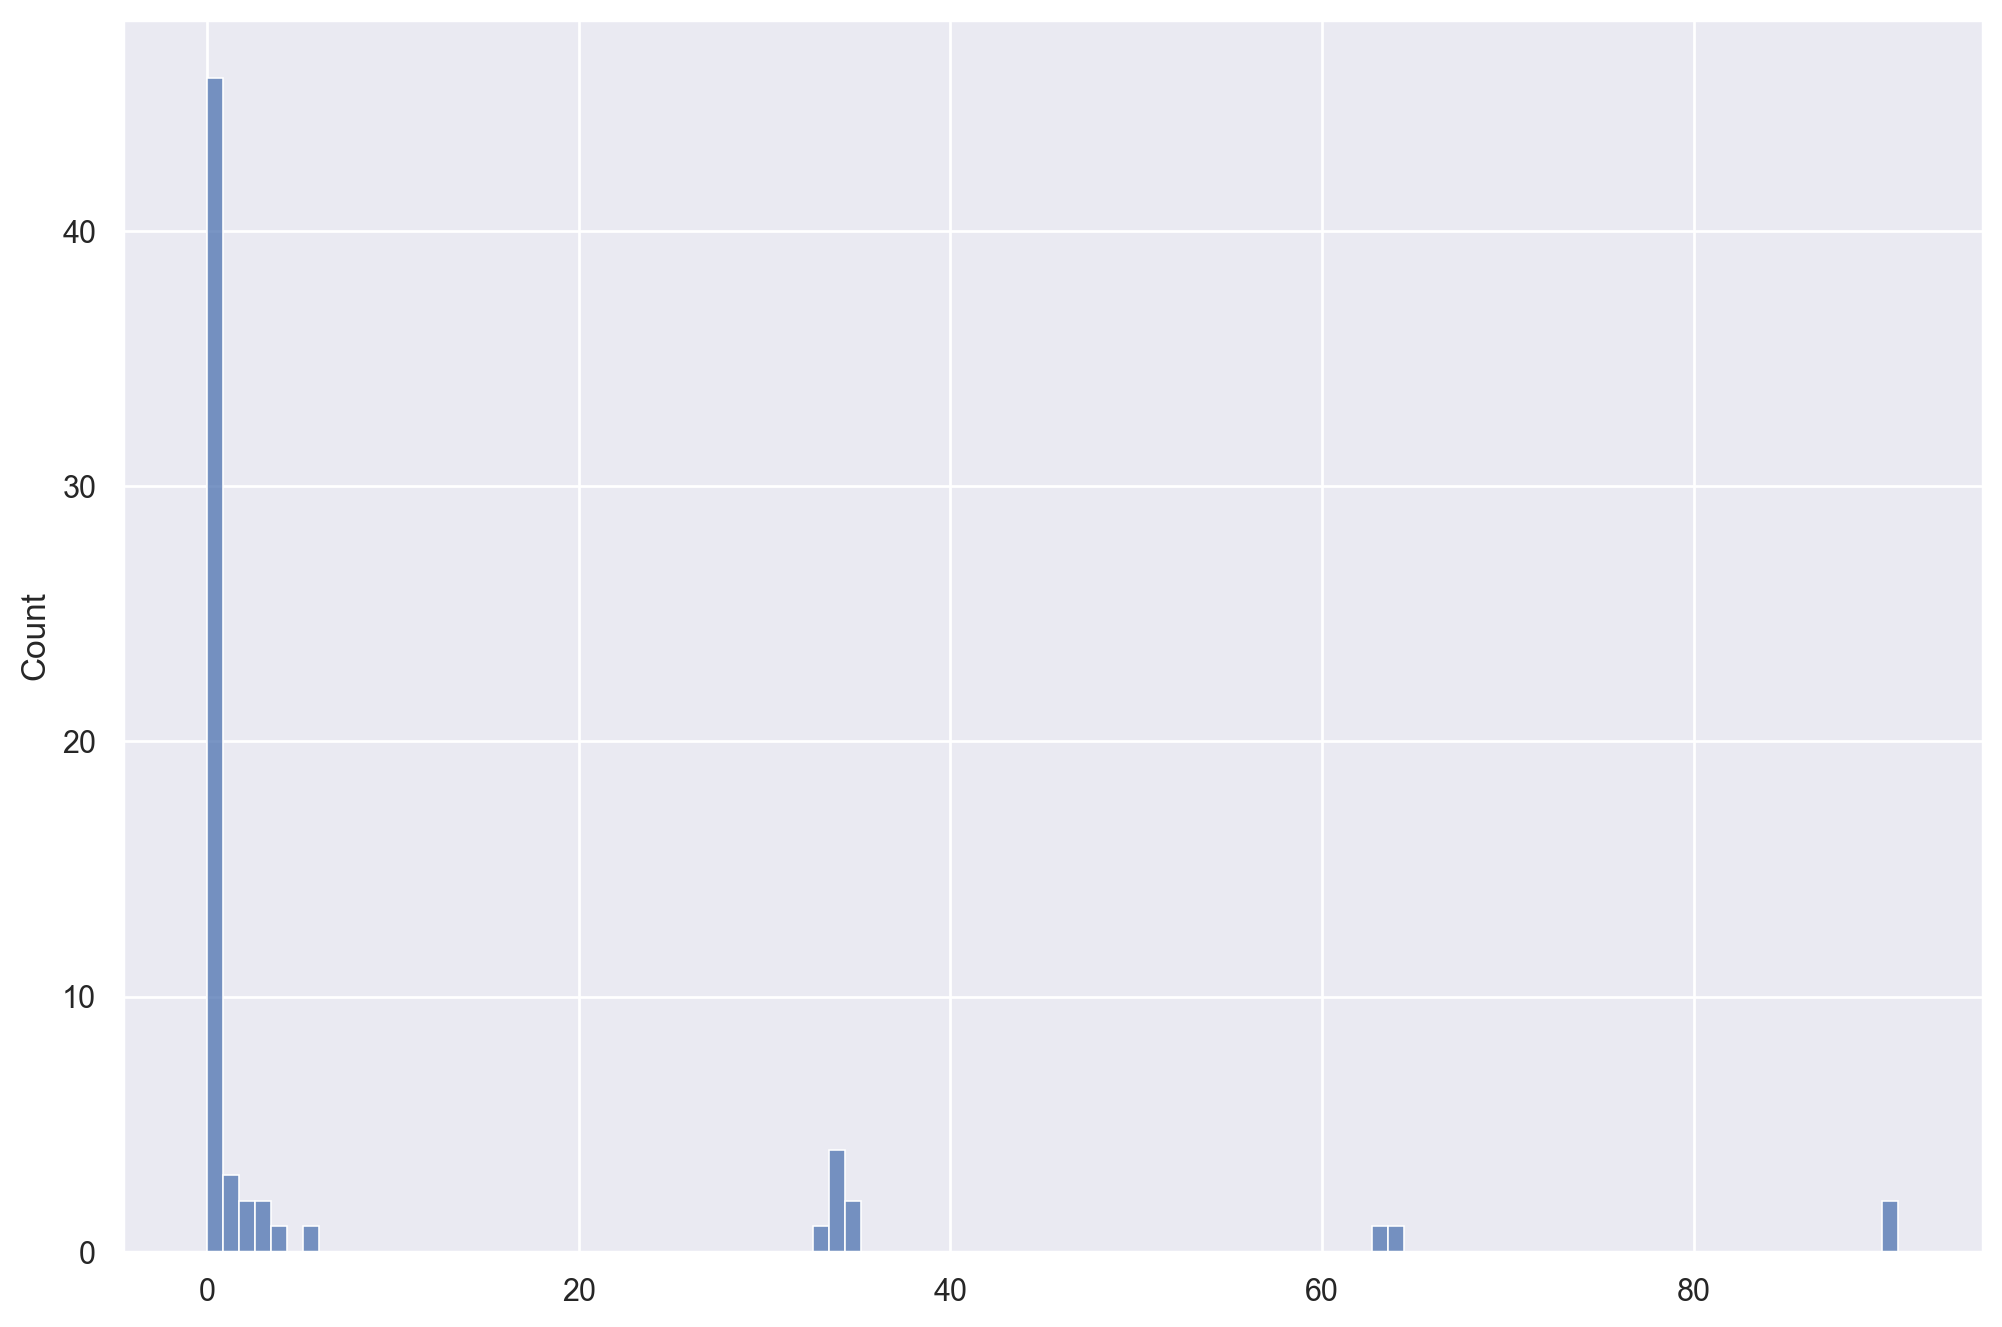

In [30]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.histplot(heights)

It seems that most of the sensor failed only a few times but there are quite a few sensors that failed for 20+. times in last 30 days. It would be interesting to see their data and see what could be reason for that failure.

In [39]:
# getting the list of sensors that has failed more more than x times and the indexes associated with that failure

interested_frequency = 20
mostly_failing_data = {}

for key, value in failing_detail.items():
    if value >=interested_frequency:
        print(key)
        

humbly_modest_vervet
early_calm_ghoul
bored_blue_fish
deadly_trusty_troll
widely_whole_tarpon
weekly_poetic_guinea
disabled_pink_prawn
evenly_divine_dingo
future_aqua_wildcat
gladly_mint_snail
openly_driven_tarpon
